# Week 1 Activity: More with Numpy, Indexing, and Playing Sound

Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code.

### Part 1: Loading, playing, and plotting an audio file. 

1) Read in a .wav file (from the Audio folder) and assign it a variable name. (You will need to import a Python library)

In [54]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read, write
from matplotlib import pyplot as plt
(fs, x) = read("../audio/80spopDrums.wav")
x

array([  0, -29, -29, ...,   0,   0,   0], dtype=int16)

2) Playback your audio file

In [23]:
Audio(x, rate=fs) 

3) Figure out the length of the .wav file in samples and its duration in seconds. If your file is longer than 5 seconds, truncate the file so it is less than 5 seconds in length.

In [1]:
samples = x.size
duration = samples/fs
x = x[:(fs*5)]

NameError: name 'x' is not defined

4) Make a plot of your file (or segment of your file). **Make sure the x-axis shows time in seconds**, label your axes, and provide a title.

Text(0, 0.5, 'Amplitude')

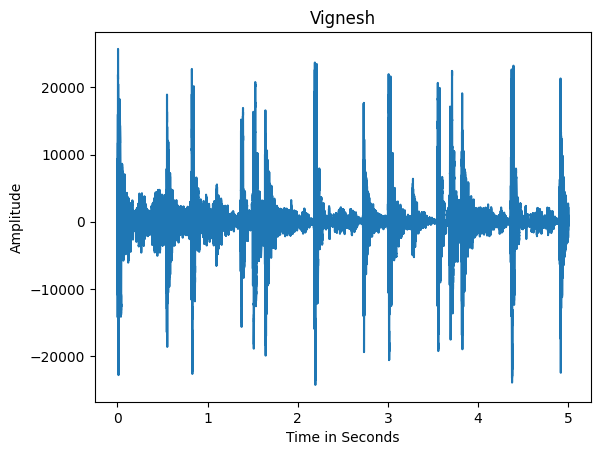

In [28]:
t = np.arange(x.size)/fs
plt.plot(t, x)
plt.title('Vignesh')
plt.xlabel('Time in Seconds')
plt.ylabel('Amplitude')

### Part 2: Manipulating the audio through NumPy functions, indexing, and boolean masking.

1) Reverse all the values in your audio array. Save in a new variable, "reverse", and play it back. 

In [29]:
reverse = np.flip(x)
Audio(reverse, rate = fs)

2) Randomize all the sample values in your original audio file and save in a new variable, "random", and use each sample exactly once. Play back the first 1 second.

In [63]:
random = np.random.permutation(x)
first_second = random[:fs]
Audio(first_second, rate = fs)

3) Remove every other sample from the original file, and save this as a new variable, "skipped". Play it back and compare to the original. Try different sample rates for playback.

*Hint: there are two ways to do this, one way removes values from the original and the other indexes from the original*

In [64]:
skipped = x[0:samples:2]
Audio(skipped, rate = fs)

4) Repeat the above, except only keep every fifth sample from the original. Play it back and compare.

In [65]:
skippedfive = x[0:samples:5]
Audio(skipped, rate = fs)

5) What have you effectively done by removing values?

In [66]:
## downsampled

6) Using your original audio file, find the position of everywhere in the file where the amplitude is greater than some value (you get to decide the value.) 

In [70]:
x[x < 5000]

array([  0, -29, -29, ...,   0,   0,   0], dtype=int16)

7) Reassign each sample that matches your 'greater than x' criteria to a new value, then playback the new array, "masked". (Be careful when setting values!)

In [71]:
x[x>5000] = 5000
Audio(x, rate=fs)

8) Using your original audio's sampling rate, figure out how many samples you would need to define a "grain" of sound that is 100ms long. Make one grain from the beginning of the original audio file, "start".

In [ ]:
start = x[:(fs//10)]

9) Using the audio arrays you have created above (reversed, masked, skipped, etc), create more grains of 50-100ms lengths then concatenate and repeat (i.e. continuously append) until you have two seconds worth of sound. Play your new sound back.

In [88]:
total = np.concatenate([
    start,
    skipped[:fs//10],
    skippedfive[500:500 + fs//10],
    reverse[4000:4000 + fs//10],
    x[10000:10000 + fs//10],
    skipped[20000:20000 + fs//10],
    skippedfive[30:30 + fs//10],
    reverse[15000:15000 + fs//10],
    x[35000:35000 + fs//10],
    skipped[750:750 + fs//10],
    skippedfive[6000:6000 + fs//10],
    reverse[10000:10000 + fs//10],
    start,
    skipped[750:750 + fs//10],
    skippedfive[6000:6000 + fs//10],
    reverse[10000:10000 + fs//10],
    x[4000:4000 + fs//10],
    skipped[35000:35000 + fs//10],
    skippedfive[20:20 + fs//10],
    reverse[4000:4000 + fs//10],
    x[20000:20000 + fs//10],
    skipped[21000:21000 + fs//10],
    skippedfive[22000:22000 + fs//10],
    reverse[23000:23000 + fs//10],
    start,
    skipped[5400:5400 + fs//10],
    skippedfive[23000:23000 + fs//10],
    reverse[17000:17000 + fs//10],
])
Audio(total, rate = fs)